# Варіант 5

#### URL: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

#### Данi: cmc.data, cmc.names
#### Вiдгук: Остання колонка

#### Факторна змiнна: Колонка 8

### Для проведення класифiкацiї потрбiно зробити наступне:

1) Опрацювати данi на предмет пропущених значень. Якщо можливо, то видалити рядки iз пропущеними значеннями, якщо ж їх занадто багато, то замiнити пропущенi значення середнiми по регресору.

2) Побудувати наївний байєсiвський класифiкатор.

3) Провести класифiкацiю методом k-nn, спробуйте рiзнi значення n.

4) Провести класифiкацiю за допомогою логiстичної регресiї.

5) Провести класифiкацiю за допомогою svm, пiдберiть рiзнi ядра та гiперпараметри.

6) Провести класифiкацiю за допомогою дерев, boosting та random forest.
Спробуйте рiзнi конфiгурацiї.

7) Додайте до моделi факторнi данi. Для цього можна скористатися рiзними технiками: присвоїти кожному фактору деяке число i проводити звичайний аналiз (для яких методiв цей пiдхiд може спрацювати краще?), iнший пiдхiд полягає у тому щоб розбити вибiрку на пiдвибiрки по кожному значенню фактора i аналiзувати пiдвибiрки окремо.
Деякi алгоритми класифiкацiї можуть працювати з факторними даними, можете використати такi алгоритми. Для виконання цього пункту можна обрати один алгоритм, який на Вашу думку, пiдiйде найкраще.

8) Напишiть висновок у якому Ви порiвняєте рiзнi алгоритми класифiкацiї та опишите отриманi результати

Також пропонується додаткове завдання. Завдання є опцiональним i виконується за бажанням студента.

9) Скачайте датасет
https://www.kaggle.com/team-ai/spam-text-message-classification
що мiстить набiр повiдомлень (спамових або нi) та побудуйте спам-фiльтр
на основi наївного байєсiвського класифiкатора.
https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering.

# Зчитуємо та об'єднуємо дані

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
direct = r"/content/drive/MyDrive/Colab Notebooks/ml_uni/Labs/contraceptive+method+choice"

files = os.listdir(direct)
print(files)


['cmc.data', 'cmc.names']


In [5]:
with open(os.path.join(direct, f"cmc.names"), "r", encoding="utf-8") as f:
  names = f.read()


print(names)


1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term m

In [6]:
import re


pattern = r'[ ]+[0-9]{1,2}\.[ ]\w+.*\('
result = re.findall(pattern, names)
# print(result)
# print(f"Початок і кінець знайденого патерну: {result.span()}\n") (для re.search)

dictionary = {}

for i in result:
  dictionary[i[:-1].strip()] = []
  # print(i[:-1].strip())

print(dictionary)


{"1. Wife's age": [], "2. Wife's education": [], "3. Husband's education": [], '4. Number of children ever born': [], "5. Wife's religion": [], "6. Wife's now working?": [], "7. Husband's occupation": [], '8. Standard-of-living index': [], '9. Media exposure': [], '10. Contraceptive method used': []}


In [165]:
# Cписок значень
clf = []

with open(os.path.join(direct, "cmc.data"), "r", encoding="utf-8") as f:
  data = f.readlines()
  for i in data:
    clf.append(i[:-1].split(","))

print(clf[:3])


[['24', '2', '3', '3', '1', '1', '2', '3', '0', '1'], ['45', '1', '3', '10', '1', '1', '3', '4', '0', '1'], ['43', '2', '3', '7', '1', '1', '3', '4', '0', '1']]


In [8]:
print(len(clf[0]))

10


In [9]:
ind = 0

while ind < len(clf[0]):
  for k in dictionary.keys():
    # print(k)
    for i in clf:
      dictionary[k].append(i[ind])
    ind += 1

print(len(dictionary["1. Wife's age"]))

1473


In [10]:
df = pd.DataFrame(dictionary)
df

,1. Wife's age,2. Wife's education,3. Husband's education,4. Number of children ever born,5. Wife's religion,6. Wife's now working?,7. Husband's occupation,8. Standard-of-living index,9. Media exposure,10. Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


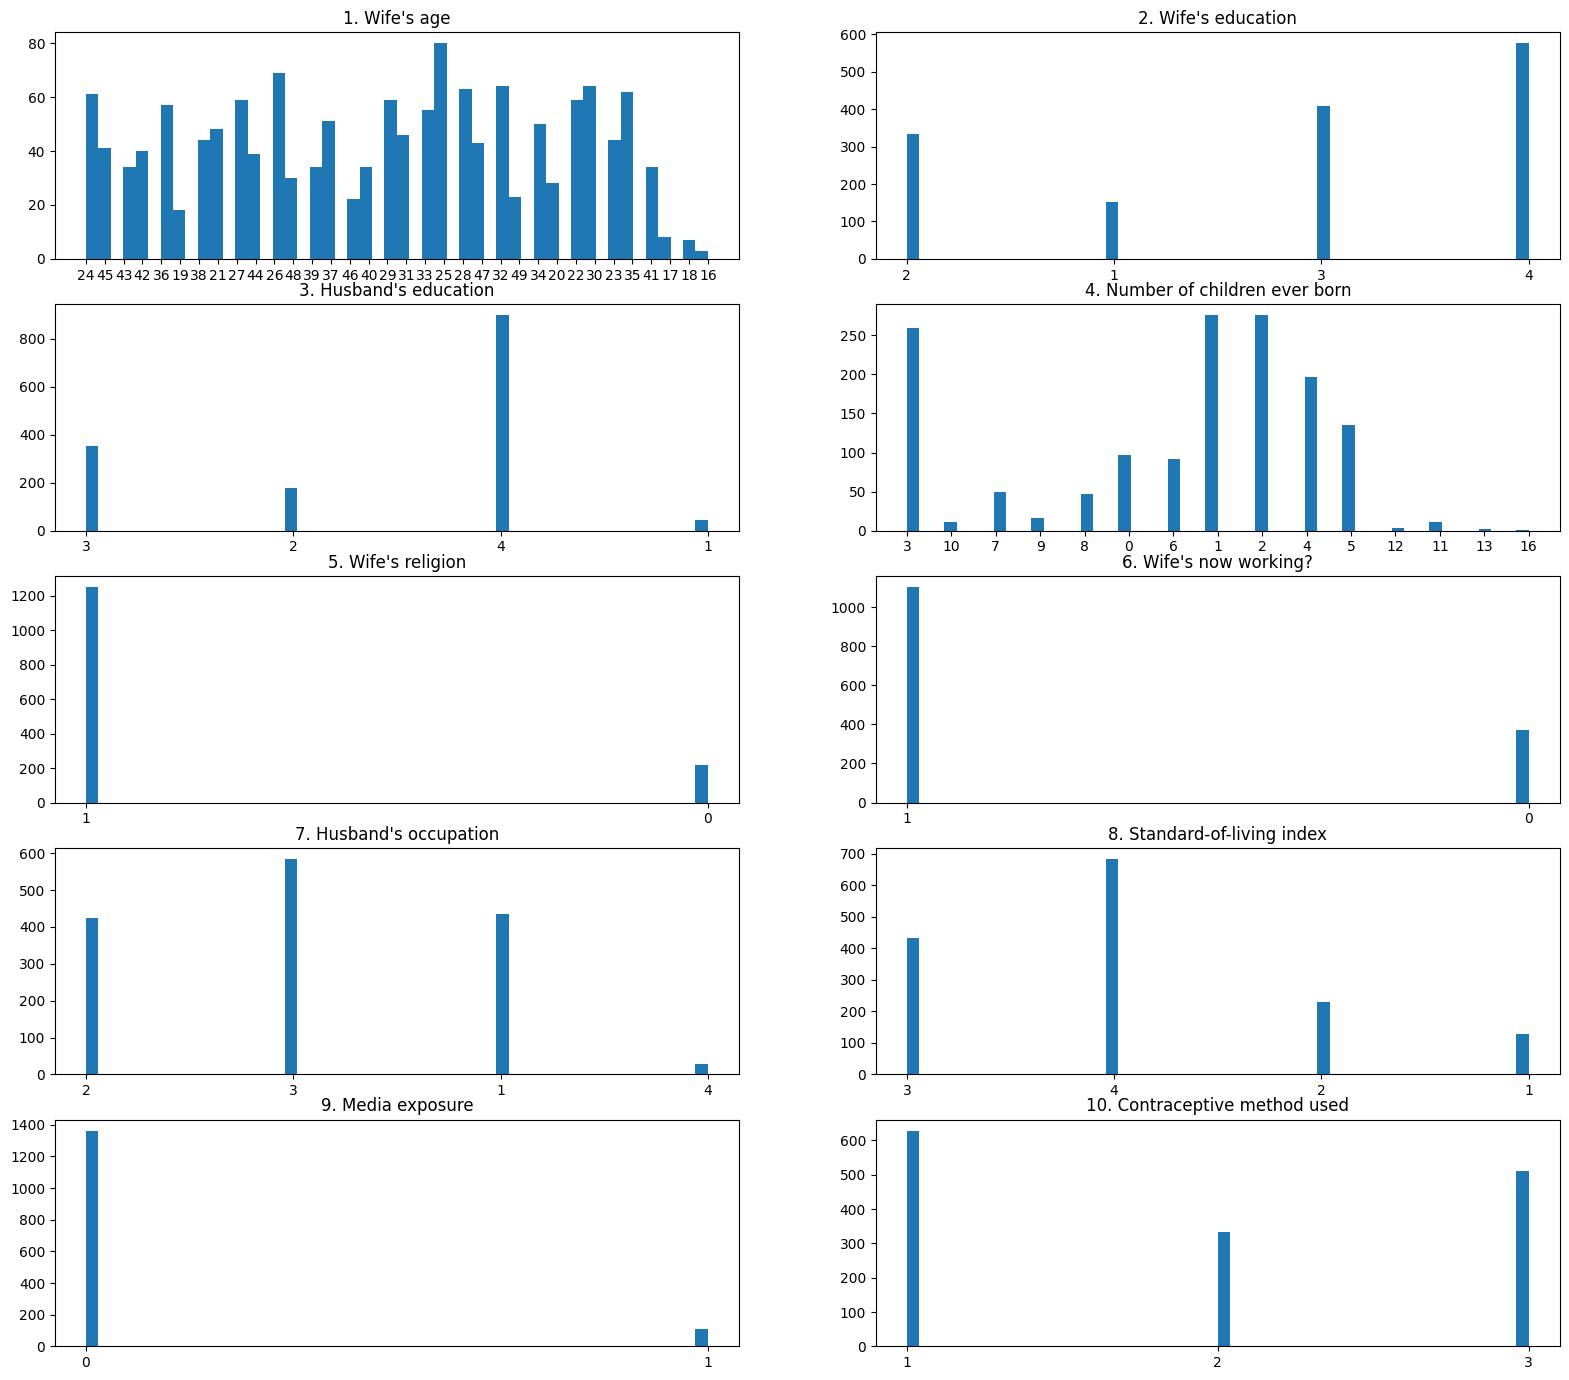

In [11]:
columns = [i for i in df]

fig, ax = plt.subplots(5, 2, figsize=(14, 6))
plt.subplots_adjust(top=2.3)
plt.subplots_adjust(right=1.2)
for k, i in enumerate(columns):
  tmp = ax[k // 2, k % 2]

  tmp.hist(df[i], bins=50)
  tmp.set_title(i)

In [12]:
# 7. Attribute Information:

#    1. Wife's age                     (numerical)
#    2. Wife's education               (categorical)      1=low, 2, 3, 4=high
#    3. Husband's education            (categorical)      1=low, 2, 3, 4=high
#    4. Number of children ever born   (numerical)
#    5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
#    6. Wife's now working?            (binary)           0=Yes, 1=No
#    7. Husband's occupation           (categorical)      1, 2, 3, 4
#    8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
#    9. Media exposure                 (binary)           0=Good, 1=Not good
#    10. Contraceptive method used     (class attribute)  1=No-use
#                                                         2=Long-term
#                                                         3=Short-term

# Також, в умові задачі сказано, що (8.) Missing Attribute Values: None

# Відгук - остання колонка; Факторна змінна - 8 колонка

# Розбиття та підготовка даних

## Видозмінюємо відгук для більш точної класифікації

In [13]:
X = df["8. Standard-of-living index"]
y = df["10. Contraceptive method used"]

print(X, y)

0       3
1       4
2       4
3       3
4       2
       ..
1468    4
1469    4
1470    4
1471    2
1472    4
Name: 8. Standard-of-living index, Length: 1473, dtype: object 0       1
1       1
2       1
3       1
4       1
       ..
1468    3
1469    3
1470    3
1471    3
1472    3
Name: 10. Contraceptive method used, Length: 1473, dtype: object


In [14]:
print(f"Categorical numbers: {X.unique()}")
print(f"Label numbers: {y.unique()}")

print(f"\nAmount of values:\n{X.value_counts()}")
print(f"\n{y.value_counts()}")

Categorical numbers: ['3' '4' '2' '1']
Label numbers: ['1' '2' '3']

Amount of values:
8. Standard-of-living index
4    684
3    431
2    229
1    129
Name: count, dtype: int64

10. Contraceptive method used
1    629
3    511
2    333
Name: count, dtype: int64


In [15]:
one_hot_encoded_data = pd.get_dummies(df[["8. Standard-of-living index", "10. Contraceptive method used"]])
one_hot_encoded_data

,8. Standard-of-living index_1,8. Standard-of-living index_2,8. Standard-of-living index_3,8. Standard-of-living index_4,10. Contraceptive method used_1,10. Contraceptive method used_2,10. Contraceptive method used_3
0,False,False,True,False,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,True,False,True,False,False
4,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...
1468,False,False,False,True,False,False,True
1469,False,False,False,True,False,False,True
1470,False,False,False,True,False,False,True
1471,False,True,False,False,False,False,True


In [16]:
one_hot_encoded_data = one_hot_encoded_data.astype(int)
one_hot_encoded_data

,8. Standard-of-living index_1,8. Standard-of-living index_2,8. Standard-of-living index_3,8. Standard-of-living index_4,10. Contraceptive method used_1,10. Contraceptive method used_2,10. Contraceptive method used_3
0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0
3,0,0,1,0,1,0,0
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
1468,0,0,0,1,0,0,1
1469,0,0,0,1,0,0,1
1470,0,0,0,1,0,0,1
1471,0,1,0,0,0,0,1


In [33]:
from sklearn.preprocessing import OneHotEncoder


# Спискок значень
categorical_columns = df["8. Standard-of-living index"].tolist()
cat = df["8. Standard-of-living index"].values.reshape(-1, 1)

print(cat.shape[0], 1)

# One Hot Encoder Init
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[["8. Standard-of-living index"]])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=["8.1", "8.2", "8.3", "8.4"])

df_encoded = pd.concat([df[["8. Standard-of-living index"]], one_hot_df], axis=1)

df_encoded

1473 1


,8. Standard-of-living index,8.1,8.2,8.3,8.4
0,3,0.0,0.0,1.0,0.0
1,4,0.0,0.0,0.0,1.0
2,4,0.0,0.0,0.0,1.0
3,3,0.0,0.0,1.0,0.0
4,2,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1468,4,0.0,0.0,0.0,1.0
1469,4,0.0,0.0,0.0,1.0
1470,4,0.0,0.0,0.0,1.0
1471,2,0.0,1.0,0.0,0.0


In [34]:
ohe_y = encoder.fit_transform(df[["10. Contraceptive method used"]])
ohe_y_df = pd.DataFrame(ohe_y, columns=["y_1", "y_2", "y_3"])
ohe_y_df

,y_1,y_2,y_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1468,0.0,0.0,1.0
1469,0.0,0.0,1.0
1470,0.0,0.0,1.0
1471,0.0,0.0,1.0


## Розбиваємо дані на train / test

In [21]:
from sklearn.model_selection import train_test_split


X = df["8. Standard-of-living index"]
y = df["10. Contraceptive method used"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.values.shape = (X_train.shape[0], 1)
X_test.values.shape = (X_test.shape[0], 1)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (1178, 1), X_test: (295, 1), y_train: (1178,), y_test: (295,)


## Розбиваємо train на te / val

In [22]:
x_te, x_val, y_te, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
x_te.values.shape = (x_te.shape[0], 1)
x_val.values.shape = (x_val.shape[0], 1)

print(f"x_te: {x_te.shape}, x_val: {x_val.shape}, y_te: {y_te.shape}, y_val: {y_val.shape}")

x_te: (942, 1), x_val: (236, 1), y_te: (942,), y_val: (236,)


## Розбиваємо One Hot Encoded Data

In [23]:
x = df_encoded[["8.1", "8.2", "8.3", "8.4"]]
Y = ohe_y_df


x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)
print(f"x_train cat: {x_train.shape}, x_test cat: {x_test.shape}, Y_train cat: {Y_train.shape}, Y_test cat: {Y_test.shape}")

# Y_train.values.shape = (Y_train.shape[0],)
# Y_test.values.shape = (Y_test.shape[0],)

# print(Y_train.shape, Y_test.shape)

x_train cat: (1178, 4), x_test cat: (295, 4), Y_train cat: (1178, 3), Y_test cat: (295, 3)


In [54]:
# Кодування за допомогою бібліотеки pandas

# x = one_hot_encoded_data[["8. Standard-of-living index_1", "8. Standard-of-living index_2", "8. Standard-of-living index_3", "8. Standard-of-living index_4"]]
# Y = one_hot_encoded_data[["10. Contraceptive method used_1", "10. Contraceptive method used_2", "10. Contraceptive method used_3"]]


# x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)
# # x_train.values.shape = (x_train.shape[0], 1)
# # x_test.values.shape = (x_test.shape[0], 1)

# print(f"x_train cat: {x_train.shape}, x_test cat: {x_test.shape}, Y_train cat: {Y_train.shape}, Y_test cat: {Y_test.shape}")

x_train cat: (1178, 4), x_test cat: (295, 4), Y_train cat: (1178, 3), Y_test cat: (295, 3)


# Naive Bayes - Наївний Баєсівський Класифікатор

## Гаусів НБК

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

gnb_pred = gnb_model.predict(X_test)

gnb_accuracy = accuracy_score(y_test, gnb_pred)

print(f"Gaussian Naive Bayes accuracy score: {gnb_accuracy}")


gnb_model.fit(x_te, y_te)
gnb_te_pred = gnb_model.predict(x_te)
gnb_val_pred = gnb_model.predict(x_val)
gnb_te_accuracy = accuracy_score(y_te, gnb_te_pred)
gnb_val_accuracy = accuracy_score(y_val, gnb_val_pred)
print(f"Gaussian Naive Bayes accuracy (te/val): {gnb_val_accuracy}")


gnb_model.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print(f"Gaussian Naive Bayes accuracy (ohe): {gnb_accuracy}")


Gaussian Naive Bayes accuracy score: 0.39661016949152544
Gaussian Naive Bayes accuracy (te/val): 0.4491525423728814
Gaussian Naive Bayes accuracy (ohe): 0.3864406779661017


## Категоріальний НБК

In [39]:
from sklearn.naive_bayes import CategoricalNB


cnb_model = CategoricalNB()
cnb_model.fit(X_train, y_train)

cnb_pred = cnb_model.predict(X_test)

cnb_accuracy = accuracy_score(y_test, cnb_pred)

print(f"Categorical Naive Bayes accuracy: {cnb_accuracy}")


cnb_model.fit(x_te, y_te)
cnb_pred = cnb_model.predict(x_val)
cnb_accuracy = accuracy_score(y_val, cnb_pred)
print(f"Categorical Naive Bayes accuracy (te/val): {cnb_accuracy}")


cnb_model.fit(x_train, y_train)
cnb_pred = cnb_model.predict(x_test)
cnb_accuracy = accuracy_score(y_test, cnb_pred)
print(f"Categorical Naive Bayes accuracy (ohe): {cnb_accuracy}")


Categorical Naive Bayes accuracy: 0.4406779661016949
Categorical Naive Bayes accuracy (te/val): 0.461864406779661
Categorical Naive Bayes accuracy (ohe): 0.4


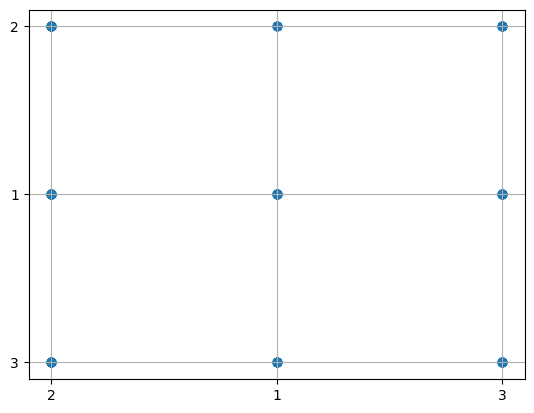

In [37]:
plt.grid()
plt.scatter(gnb_pred, y_test, alpha=0.6)
plt.show()

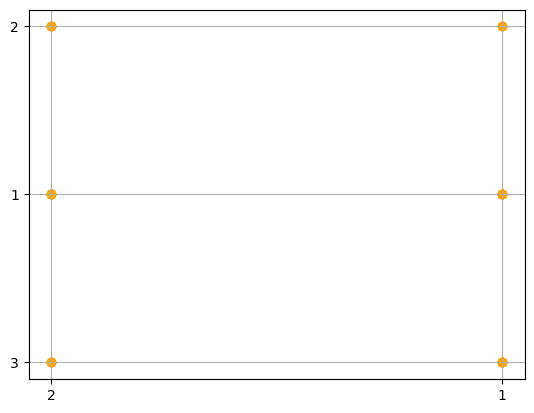

In [40]:
plt.grid()
plt.scatter(cnb_pred, y_test, alpha=0.1, color="orange")
plt.show()

# KNN (K-Nearest-Neighbors) - Метод найближчих сусідів

In [42]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"KNN Classifier accuracy: {knn_accuracy}")


knn_model.fit(x_te, y_te)
knn_pred = knn_model.predict(x_val)
knn_accuracy = accuracy_score(y_val, knn_pred)
print(f"KNN Classifier accuracy (te/val): {knn_accuracy}")


knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Classifier accuracy (ohe): {knn_accuracy}")


KNN Classifier accuracy: 0.39661016949152544
KNN Classifier accuracy (te/val): 0.4491525423728814
KNN Classifier accuracy (ohe): 0.39661016949152544


In [63]:
k_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 20, 21]


for k in k_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  pred = knn.predict(X_test)

  accuracy = accuracy_score(y_test, pred)
  print(f"knn accuracy for {k}: {accuracy}")


for k in k_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_te, y_te)

  pred = knn.predict(x_val)

  accuracy = accuracy_score(y_val, pred)
  print(f"knn accuracy (te/val) for {k}: {accuracy}")


train_accuracies = []
test_accuracies = []


for k in k_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  te_pred = knn.predict(x_test)
  tr_pred = knn.predict(x_train)

  te_acc = accuracy_score(y_test, te_pred)
  test_accuracies.append(te_acc)

  tr_acc = accuracy_score(y_train, tr_pred)
  train_accuracies.append(tr_acc)

  accuracy = accuracy_score(y_test, te_pred)
  print(f"knn accuracy (ohe) for {k}: {accuracy}")


knn accuracy for 1: 0.38305084745762713
knn accuracy for 2: 0.38305084745762713
knn accuracy for 3: 0.38305084745762713
knn accuracy for 4: 0.39661016949152544
knn accuracy for 5: 0.39661016949152544
knn accuracy for 6: 0.39661016949152544
knn accuracy for 7: 0.39661016949152544
knn accuracy for 8: 0.39661016949152544
knn accuracy for 9: 0.4
knn accuracy for 10: 0.4
knn accuracy for 11: 0.4
knn accuracy for 12: 0.38305084745762713
knn accuracy for 16: 0.39661016949152544
knn accuracy for 20: 0.39661016949152544
knn accuracy for 21: 0.39661016949152544
knn accuracy (te/val) for 1: 0.4194915254237288
knn accuracy (te/val) for 2: 0.461864406779661
knn accuracy (te/val) for 3: 0.461864406779661
knn accuracy (te/val) for 4: 0.4491525423728814
knn accuracy (te/val) for 5: 0.4491525423728814
knn accuracy (te/val) for 6: 0.4491525423728814
knn accuracy (te/val) for 7: 0.4491525423728814
knn accuracy (te/val) for 8: 0.4491525423728814
knn accuracy (te/val) for 9: 0.4491525423728814
knn accuracy

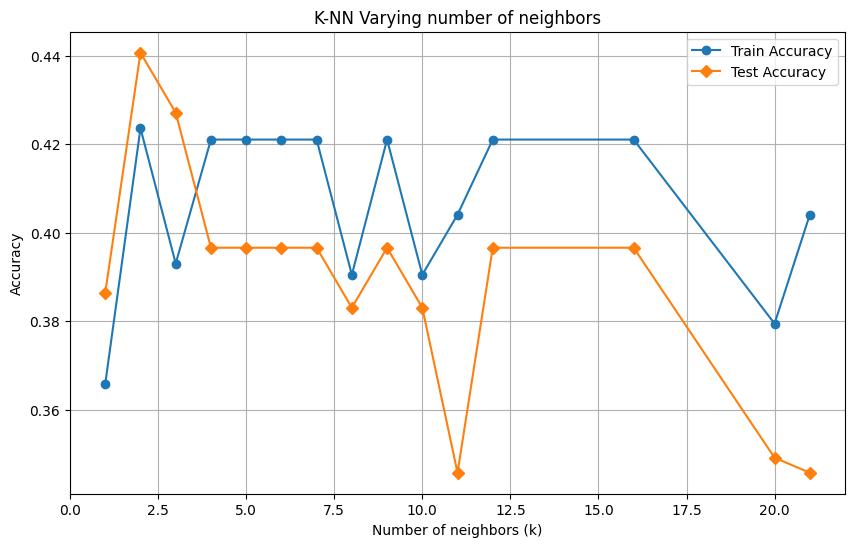

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(k_neighbors, train_accuracies, marker="o", label="Train Accuracy")
plt.plot(k_neighbors, test_accuracies, marker="D", label="Test Accuracy")
plt.title("K-NN Varying number of neighbors")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Logistic Regression - Логістична регресія

In [44]:
from sklearn.linear_model import LogisticRegression


clf_model = LogisticRegression(max_iter=100, random_state=0)
clf_model.fit(X_train, y_train)

print(f"LR score: {clf_model.score(X_train, y_train)}")

clf_pred = clf_model.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_pred)

print(f"LR accuracy: {clf_accuracy}")


clf_model.fit(x_te, y_te)
clf_pred = clf_model.predict(x_val)
clf_accuracy = accuracy_score(y_val, clf_pred)
print(f"LR accuracy (te/val): {clf_accuracy}")


clf_model.fit(x_train, y_train)
clf_pred = clf_model.predict(x_test)
clf_accuracy = accuracy_score(y_test, clf_pred)
print(f"LR accuracy (ohe): {clf_accuracy}")


LR score: 0.42105263157894735
LR accuracy: 0.39661016949152544
LR accuracy (te/val): 0.4491525423728814
LR accuracy (ohe): 0.4406779661016949


# SVC (Support Vector Classification) - Метод опорних векторів

In [45]:
from sklearn.svm import SVC


svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"SVM accuracy: {svm_accuracy}")


svm_model.fit(x_te, y_te)
svm_pred = svm_model.predict(x_val)
svm_accuracy = accuracy_score(y_val, svm_pred)
print(f"SVM accuracy (te/val): {svm_accuracy}")


svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM accuracy (ohe): {svm_accuracy}")


SVM accuracy: 0.4406779661016949
SVM accuracy (te/val): 0.461864406779661
SVM accuracy (ohe): 0.4406779661016949


In [46]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

for k in kernels:
  svm = SVC(kernel=k).fit(X_train, y_train)

  pred = svm.predict(X_test)

  accuracy = accuracy_score(y_test, pred)

  print(f"SVM accuracy for kernel '{k}': {accuracy}")


for k in kernels:
  svm = SVC(kernel=k).fit(x_te, y_te)

  pred = svm.predict(x_val)

  accuracy = accuracy_score(y_val, pred)

  print(f"SVM accuracy score (te/val) for kernel '{k}': {accuracy}")


for k in kernels:
  svm = SVC(kernel=k).fit(x_train, y_train)

  pred = svm.predict(x_test)

  accuracy = accuracy_score(y_test, pred)

  print(f"SVM accuracy score (ohe) for kernel '{k}': {accuracy}")

SVM accuracy for kernel 'linear': 0.4406779661016949
SVM accuracy for kernel 'poly': 0.4406779661016949
SVM accuracy for kernel 'rbf': 0.4406779661016949
SVM accuracy for kernel 'sigmoid': 0.3423728813559322
SVM accuracy score (te/val) for kernel 'linear': 0.461864406779661
SVM accuracy score (te/val) for kernel 'poly': 0.461864406779661
SVM accuracy score (te/val) for kernel 'rbf': 0.461864406779661
SVM accuracy score (te/val) for kernel 'sigmoid': 0.3432203389830508
SVM accuracy score (ohe) for kernel 'linear': 0.4406779661016949
SVM accuracy score (ohe) for kernel 'poly': 0.4406779661016949
SVM accuracy score (ohe) for kernel 'rbf': 0.4406779661016949
SVM accuracy score (ohe) for kernel 'sigmoid': 0.4406779661016949


In [47]:
C = [float(i) for i in range(1, 16)]

for k in C:
  svm = SVC(C=k).fit(X_train, y_train)

  pred = svm.predict(X_test)

  accuracy = accuracy_score(y_test, pred)

  print(f"SVM accuracy for hyperparameter C = '{k}': {accuracy}")


for k in C:
  svm = SVC(C=k).fit(x_te, y_te)

  pred = svm.predict(x_val)

  accuracy = accuracy_score(y_val, pred)

  print(f"SVM accuracy score (te/val) for hyperparameter C = '{k}': {accuracy}")


for k in C:
  svm = SVC(C=k).fit(x_train, y_train)

  pred = svm.predict(x_test)

  accuracy = accuracy_score(y_test, pred)

  print(f"SVM accuracy score (ohe) for hyperparameter C = '{k}': {accuracy}")

SVM accuracy for hyperparameter C = '1.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '2.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '3.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '4.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '5.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '6.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '7.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '8.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '9.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '10.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '11.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '12.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '13.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '14.0': 0.4406779661016949
SVM accuracy for hyperparameter C = '15.0': 0.4406779661016949
SVM accuracy score (te/val) for hyperparameter C = '1.0': 0.4618

# DT (Decision trees) - Дерева рішень

In [48]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"Decision trees accuracy: {dt_accuracy}")


dt_model.fit(x_te, y_te)
dt_pred = dt_model.predict(x_val)
dt_accuracy = accuracy_score(y_val, dt_pred)
print(f"Decision trees accuracy score (te/val): {dt_accuracy}")


dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision trees accuracy score (ohe): {dt_accuracy}")


Decision trees accuracy: 0.4406779661016949
Decision trees accuracy score (te/val): 0.461864406779661
Decision trees accuracy score (ohe): 0.4406779661016949


# GBR (Gradient Boosting Classifier) - Градієнтний бустінг (ансамблі)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier


gbr_model = GradientBoostingClassifier()
gbr_model.fit(X_train, y_train)

gbr_pred = gbr_model.predict(X_test)

gbr_accuracy = accuracy_score(y_test, gbr_pred)

print(f"GBR accuracy: {gbr_accuracy}")


gbr_model.fit(x_te, y_te)
gbr_pred = gbr_model.predict(x_val)
gbr_accuracy = accuracy_score(y_val, gbr_pred)
print(f"GBR accuracy score (te/val): {gbr_accuracy}")


gbr_model.fit(x_train, y_train)
gbr_pred = gbr_model.predict(x_test)
gbr_accuracy = accuracy_score(y_test, gbr_pred)
print(f"GBR accuracy score (ohe): {gbr_accuracy}")


GBR accuracy: 0.4406779661016949
GBR accuracy score (te/val): 0.461864406779661
GBR accuracy score (ohe): 0.4406779661016949


# Random Forest Classifier - Випадковий ліс

In [50]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest accuracy: {rf_accuracy}")


rf_model.fit(x_te, y_te)
rf_pred = rf_model.predict(x_val)
rf_accuracy = accuracy_score(y_val, rf_pred)
print(f"Random Forest accuracy score (te/val): {rf_accuracy}")


rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest accuracy score (ohe): {rf_accuracy}")


Random Forest accuracy: 0.4406779661016949
Random Forest accuracy score (te/val): 0.461864406779661
Random Forest accuracy score (ohe): 0.4406779661016949


In [ ]:
# 7. Attribute Information:

#    1. Wife's age                     (numerical)
#    2. Wife's education               (categorical)      1=low, 2, 3, 4=high
#    3. Husband's education            (categorical)      1=low, 2, 3, 4=high
#    4. Number of children ever born   (numerical)
#    5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
#    6. Wife's now working?            (binary)           0=Yes, 1=No
#    7. Husband's occupation           (categorical)      1, 2, 3, 4
#    8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
#    9. Media exposure                 (binary)           0=Good, 1=Not good
#    10. Contraceptive method used     (class attribute)  1=No-use
#                                                         2=Long-term
#                                                         3=Short-term

# Також, в умові задачі сказано, що (8.) Missing Attribute Values: None

# Відгук - остання колонка; Факторна змінна - 8 колонка

# Деякі висновки

#### 1) В загальному вигляді, точність класифікації за допомогою One Hot Encoding майже не відрізняється від точності при звичайній класифікації.

#### 2) Якщо зменшувати розмір вибірки Х, то показники accuracy будуть вищими.

#### 3) Точність моделей між собою трохи коливається. Можна підібрати для себе найкращу.

# Додаємо інші факторні змінні

## Факторні змінні:

#### 1) "2. Wife's education"

#### 2) "8. Standard-of-living index"

In [83]:
X_1 = df[["2. Wife's education", "8. Standard-of-living index"]]
X_1

,2. Wife's education,8. Standard-of-living index
0,2,3
1,1,4
2,2,4
3,3,3
4,3,2
...,...,...
1468,4,4
1469,4,4
1470,3,4
1471,3,2


# Моделі SVC та Logistic Regression

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)
X_train.values.shape = (X_train.shape[0], 2)
X_test.values.shape = (X_test.shape[0], 2)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1178, 2), X_test: (295, 2), y_train: (1178,), y_test: (295,)


In [92]:
svm = SVC()
svm.fit(X_train, y_train)

svm_tr_pred = svm.predict(X_train)
svm_te_pred = svm.predict(X_test)

svm_tr_acc = accuracy_score(svm_tr_pred, y_train)
svm_te_acc = accuracy_score(svm_te_pred, y_test)

print(svm_tr_acc, svm_te_acc)

0.44991511035653653 0.4745762711864407


In [96]:
x_te, x_val, y_te, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"x_te: {x_te.shape}, x_val: {x_val.shape}, y_te: {y_te.shape}, y_val: {y_val.shape}")

svm.fit(x_te, y_te)

svm_t_pred = svm.predict(x_te)
svm_v_pred = svm.predict(x_val)

svm_t_acc = accuracy_score(svm_t_pred, y_te)
svm_v_acc = accuracy_score(svm_v_pred, y_val)

print(svm_t_acc, svm_v_acc)

x_te: (942, 2), x_val: (236, 2), y_te: (942,), y_val: (236,)
0.44904458598726116 0.4533898305084746


In [94]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_tr_pred = lr.predict(X_train)
lr_te_pred = lr.predict(X_test)

lr_tr_acc = accuracy_score(lr_tr_pred, y_train)
lr_te_acc = accuracy_score(lr_te_pred, y_test)

print(lr_tr_acc, lr_te_acc)

0.44991511035653653 0.4745762711864407


In [97]:
lr.fit(x_te, y_te)

lr_t_pred = lr.predict(x_te)
lr_v_pred = lr.predict(x_val)

lr_t_acc = accuracy_score(lr_t_pred, y_te)
lr_v_acc = accuracy_score(lr_v_pred, y_val)

print(lr_t_acc, lr_v_acc)

0.4437367303609342 0.4533898305084746


## Факторні змінні:

#### 1) "2. Wife's education"

#### 2) "4. Number of children ever born"

#### 3) "8. Standard-of-living index"

In [98]:
X_2 = df[["2. Wife's education", "4. Number of children ever born", "8. Standard-of-living index"]]
X_2

,2. Wife's education,4. Number of children ever born,8. Standard-of-living index
0,2,3,3
1,1,10,4
2,2,7,4
3,3,9,3
4,3,8,2
...,...,...,...
1468,4,2,4
1469,4,3,4
1470,3,8,4
1471,3,4,2


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)
X_train.values.shape = (X_train.shape[0], 3)
X_test.values.shape = (X_test.shape[0], 3)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1178, 3), X_test: (295, 3), y_train: (1178,), y_test: (295,)


In [101]:
svm = SVC()
svm.fit(X_train, y_train)

svm_tr_pred = svm.predict(X_train)
svm_te_pred = svm.predict(X_test)

svm_tr_acc = accuracy_score(svm_tr_pred, y_train)
svm_te_acc = accuracy_score(svm_te_pred, y_test)

print(svm_tr_acc, svm_te_acc)

0.530560271646859 0.5559322033898305


In [103]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_tr_pred = lr.predict(X_train)
lr_te_pred = lr.predict(X_test)

lr_tr_acc = accuracy_score(lr_tr_pred, y_train)
lr_te_acc = accuracy_score(lr_te_pred, y_test)

print(lr_tr_acc, lr_te_acc)

0.47538200339558573 0.5050847457627119


## kernels для Логістичної Регресії

In [107]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

tr_acc = {i: [] for i in kernels}
te_acc = {i: [] for i in kernels}

for k in kernels:
  svm = SVC(kernel=k).fit(X_train, y_train)

  tr_pred = svm.predict(X_train)
  te_pred = svm.predict(X_test)

  tr_accuracy = accuracy_score(y_train, tr_pred)
  tr_acc[k].append(tr_accuracy)

  te_accuracy = accuracy_score(y_test, te_pred)
  te_acc[k].append(te_accuracy)

print(f"SVM train accuracy:\n{tr_acc}\nSVM test accuracy\n{te_acc}")

SVM train accuracy:
{'linear': [0.4439728353140917], 'poly': [0.5195246179966044], 'rbf': [0.530560271646859], 'sigmoid': [0.3073005093378608]}
SVM test accuracy
{'linear': [0.4406779661016949], 'poly': [0.559322033898305], 'rbf': [0.5559322033898305], 'sigmoid': [0.30847457627118646]}


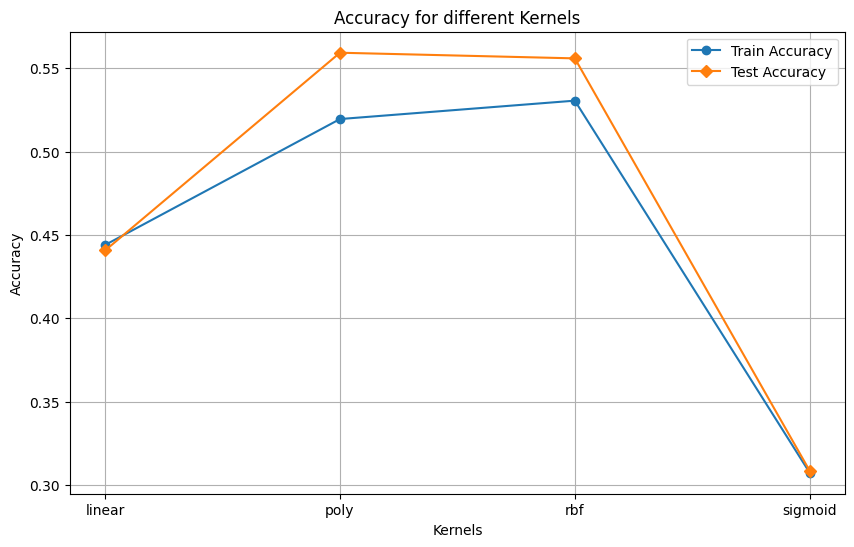

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(kernels, tr_acc.values(), marker="o", label="Train Accuracy")
plt.plot(kernels, te_acc.values(), marker="D", label="Test Accuracy")
plt.title("Accuracy for different Kernels")
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()



---



# Додаткове завдання (Спам-фільтр)

### 9) Скачайте датасет https://www.kaggle.com/team-ai/spam-text-message-classification що мiстить набiр повiдомлень (спамових або нi) та побудуйте спам-фiльтр на основi наївного байєсiвського класифiкатора. https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering.

In [110]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_uni/Labs/SPAM text message 20170820 - Data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [118]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [121]:
cat = data["Category"].value_counts()
print(cat)

Category
ham     4825
spam     747
Name: count, dtype: int64


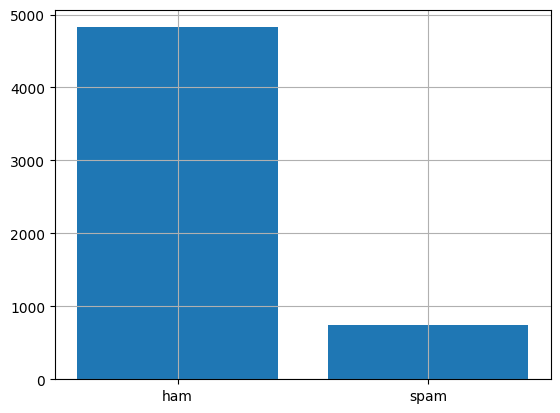

In [126]:
plt.bar(["ham", "spam"], [cat[0], cat[1]])
plt.grid()
plt.show()

## Розбиваємо вибірку

In [154]:
X = data["Message"]
y = data["Category"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (4457,), X_test: (1115,), y_train: (4457,), y_test: (1115,)


## Переводимо слова у вектори

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

tfid_train = vectorizer.fit_transform(X_train)
tfid_test = vectorizer.fit_transform(X_test)

print(f"tfid_X_train: {tfid_train.shape}, tfid_X_test: {tfid_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

tfid_X_train: (4457, 7701), tfid_X_test: (1115, 3545)
y_train: (4457,), y_test: (1115,)


In [148]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()
data["Label Encoder"] = label_enc.fit_transform(data["Category"])

data

,Category,Message,Label Encoder
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [156]:
Y = data["Label Encoder"]

Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=42)

print(f"Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

Y_train: (4457,), Y_test: (1115,)


In [164]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(tfid_train, y_train)

tr_nb_acc = nb.score(tfid_train, y_train)


print(f"filter spam/ham train accuracy: {tr_nb_acc}, filter 1/0 train accuracy: {nb.fit(tfid_train, Y_train).score(tfid_train, Y_train)}")


nb.fit(tfid_test, y_test)
te_nb_acc = nb.score(tfid_test, y_test)

print(f"filter spam/ham test accuracy: {te_nb_acc}, filter 1/0 test accuracy: {nb.fit(tfid_test, Y_test).score(tfid_test, Y_test)}")


# pred = nb_fit.predict(tfid_test)
# acc = accuracy_score(Y_test, pred)
# print(acc)


filter spam/ham train accuracy: 0.9726273277989679, filter 1/0 train accuracy: 0.9726273277989679
filter spam/ham test accuracy: 0.9560538116591928, filter 1/0 test accuracy: 0.9560538116591928
